In [1]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
print(titanic.head())
print('\n')
print(titanic.info())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-

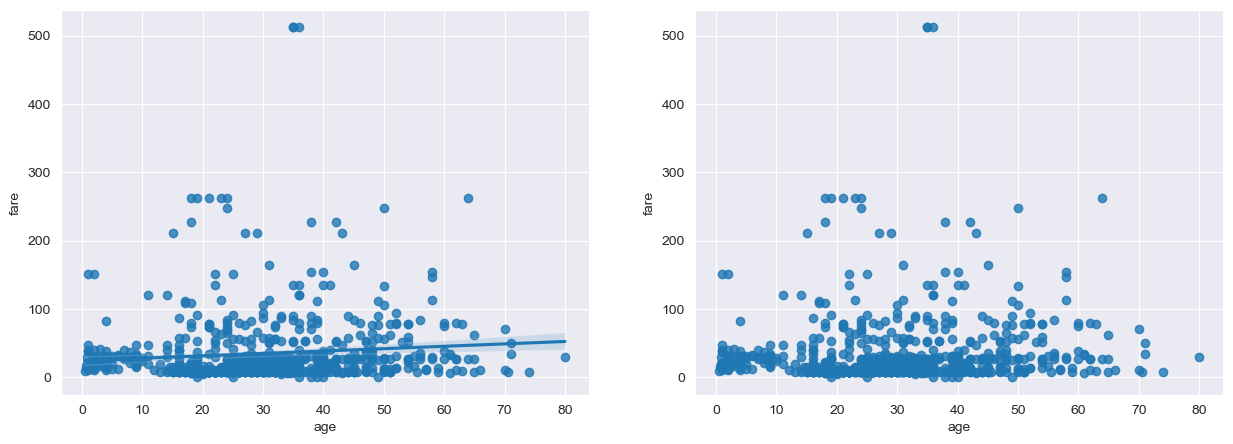

In [15]:
import matplotlib.pyplot as plt
iris = sns.load_dataset('iris')
sns.set_style('darkgrid')
fig=plt.figure(figsize = (15,5))
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)

sns.regplot(x='age', y='fare',
            data=titanic, 
            ax=ax1,
            #회귀선(군집도가 모여있는 구간의 기울기)
            fit_reg=True)

sns.regplot(x='age', y='fare',
            data=titanic,
            ax=ax2,
            fit_reg=False)

plt.show()

In [16]:
#test set을 만드는 작업
# :-1 처음 행부터 마지막 행 앞에까지 
# -1 마지막 행
x = iris.iloc[:,:-1]
y = iris.iloc[:,-1]

In [17]:
#사이킷런 머신러닝 도구 : 통계분야 
#train_test_split 방대한 데이터를 split(잘라서 저장) 클래스
from sklearn.model_selection import train_test_split

In [18]:
#학습용 데이터 x값(범위)과 검증용 데이터 y값(범위)를 저장하는 변수
train_X, test_X, train_y, test_y = train_test_split(x, y,
                                                    test_size=0.3,
                                                    random_state=1)

In [19]:
#분류작업하는 클래스(DecisionTreeClassifier)
from sklearn.tree import DecisionTreeClassifier

In [20]:
dt_model = DecisionTreeClassifier(random_state=1)

In [21]:
#학습용 데이터 모두 가져오기
dt_model.fit(train_X, train_y)

DecisionTreeClassifier(random_state=1)

In [22]:
#머신러닝의 뉴럴엔진을 사용하여 분류모델 작업
#뉴럴엔진 :  사람의 뇌신경과 비슷하게 자극을 주면, 결과물이 출력되는 함수
from sklearn.neural_network import MLPClassifier

In [29]:
#MLPClassifier 클래스를 사용하여 모델을 작성
#히든 레이어 갯수는 2만개, 반복 500회 등등 옵션
mlp_model = MLPClassifier(hidden_layer_sizes = (100,200,50,20),
                            max_iter=500, random_state=1)

In [37]:
#데이터를 학습(학습용 데이터 모두 가져오기)
mlp_model.fit(train_X, train_y)

MLPClassifier(hidden_layer_sizes=(100, 200, 50, 20), max_iter=500,
              random_state=1)

In [31]:
dt_model.predict(test_X)

array(['setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'versicolor', 'virginica', 'setosa', 'setosa', 'virginica',
       'versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'versicolor', 'virginica', 'setosa', 'virginica',
       'versicolor', 'setosa', 'setosa', 'versicolor', 'virginica',
       'versicolor', 'virginica', 'versicolor', 'virginica', 'virginica',
       'setosa', 'versicolor', 'setosa', 'versicolor', 'virginica',
       'virginica', 'setosa', 'versicolor', 'virginica', 'versicolor'],
      dtype=object)

In [32]:
dt_pred_y = dt_model.predict(test_X)

In [33]:
#판다스 툴로 결과물 출력
import pandas as pd
#테이블 모형으로 결과 그래프 출력
pd.crosstab(test_y, dt_pred_y)
#y축은 예측, x축은 사실
#ex)setosa라고 예측한것이 정확하게 14개를 맞췄다. 

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,17,1
virginica,0,1,12


In [34]:
#결과 예측능력 출력
dt_model.score(test_X, test_y)

0.9555555555555556

In [38]:
mlp_pred_y = mlp_model.predict(test_X)

In [39]:
#mlpClassifier 모델은 좀더 정확하게 예측하는 결과 출력
#분석 모델 알고리즘으로는 treeClassifier보다 mlpClassifier가 더 좋음
pd.crosstab(test_y, mlp_pred_y)

col_0,setosa,versicolor,virginica
species,,,
setosa,14,0,0
versicolor,0,17,1
virginica,0,0,13


In [40]:
mlp_model.score(test_X, test_y)

0.9777777777777777